<a href="https://colab.research.google.com/github/Asayil-20/Data-Analysis-2/blob/main/Groceries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Groceries_dataset.csv')

In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

In [ ]:
# Convert 'Date' data type
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Add 'year', 'month', and 'day' columns
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_name'] = data['Date'].dt.day_name()

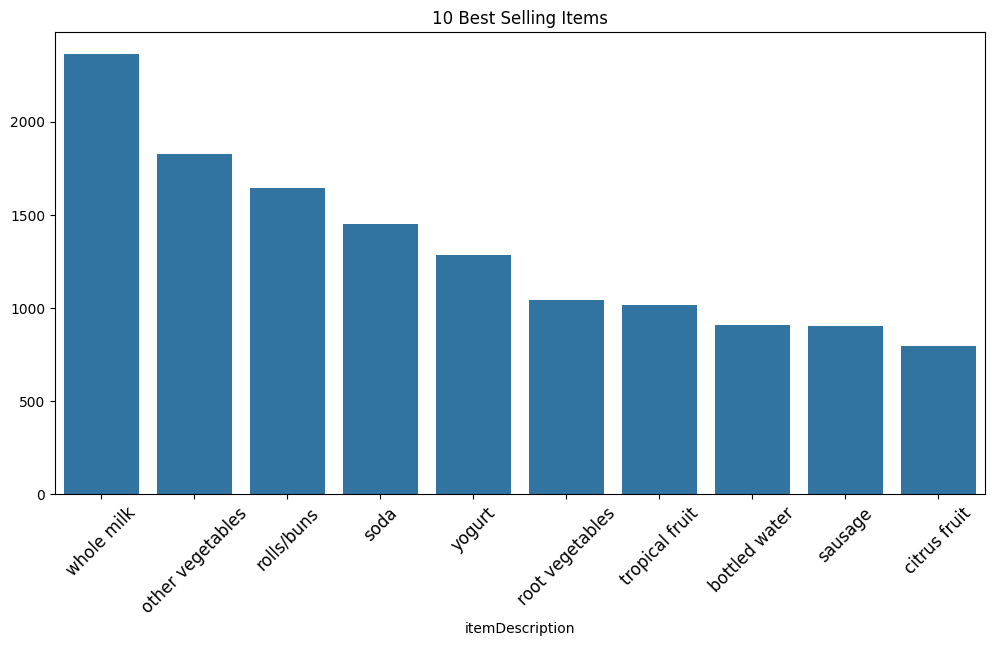

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(x = data['itemDescription'].value_counts()[:10].index,
           y = data['itemDescription'].value_counts()[:10].values)
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.show()

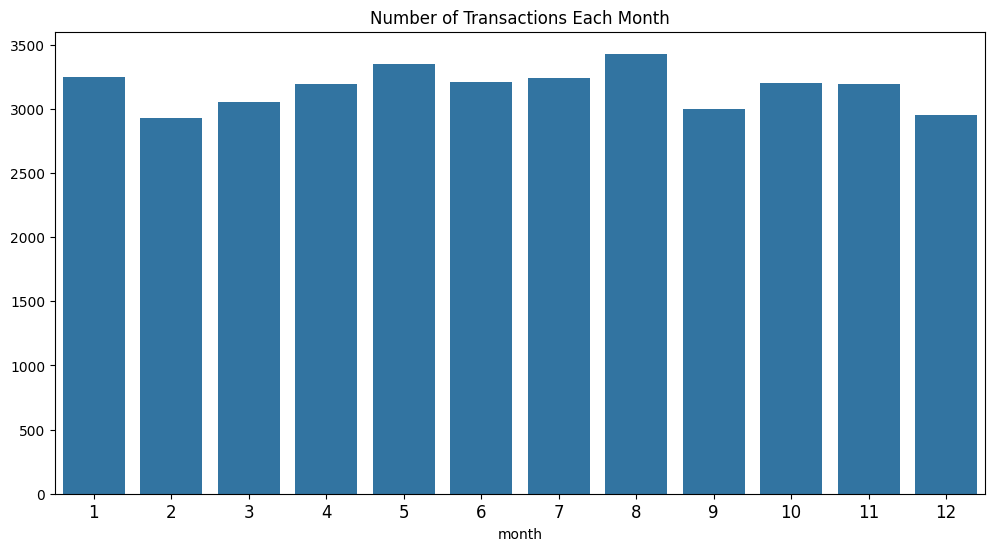

In [ ]:
# Number of transactions each month
plt.figure(figsize=(12,6))

sns.barplot(x = data['month'].value_counts().index,
           y = data['month'].value_counts().values)
plt.xticks(size=12)
plt.title('Number of Transactions Each Month')
plt.show()

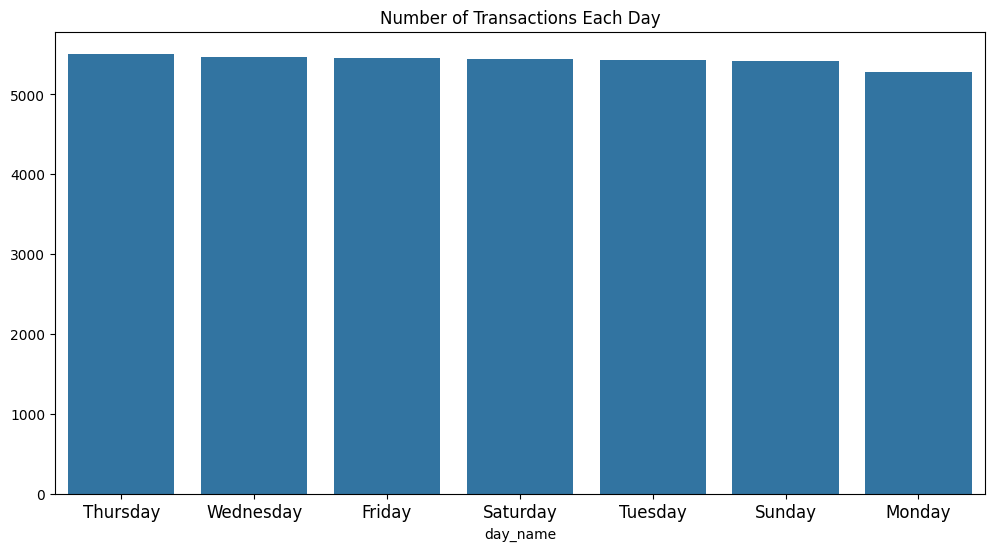

In [ ]:
# Number of transactions each day
plt.figure(figsize=(12,6))

sns.barplot(x = data['day_name'].value_counts().index,
           y = data['day_name'].value_counts().values)
plt.xticks(size=12)
plt.title('Number of Transactions Each Day')
plt.show()

In [ ]:
item_count = data.groupby(['Member_number', 'Date', 'itemDescription'])['itemDescription'].count().reset_index(name='Count')
item_count.head(10)

,Member_number,Date,itemDescription,Count
0,1000,2014-06-24,pastry,1
1,1000,2014-06-24,salty snack,1
2,1000,2014-06-24,whole milk,1
3,1000,2015-03-15,sausage,1
4,1000,2015-03-15,semi-finished bread,1
5,1000,2015-03-15,whole milk,1
6,1000,2015-03-15,yogurt,1
7,1000,2015-05-27,pickled vegetables,1
8,1000,2015-05-27,soda,1
9,1000,2015-07-24,canned beer,1


In [ ]:
item_count['Transaction'] = item_count.groupby(['Member_number', 'Date'])['Date'].ngroup()+1

In [ ]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)

In [ ]:
# drop comma
item_count_pivot = item_count_pivot.astype('int32')

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
basket = item_count.groupby('Transaction')['itemDescription'].apply(list).reset_index()
basket_encoded = basket['itemDescription'].str.join('|').str.get_dummies('|')


In [ ]:
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
47,0.069572,(root vegetables)
57,0.067767,(tropical fruit)
5,0.060683,(bottled water)
49,0.060349,(sausage)
15,0.053131,(citrus fruit)


In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
9,(yogurt),(whole milk),0.011161,0.129961,0.822940
5,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
3,(other vegetables),(whole milk),0.014837,0.121511,0.769430
7,(soda),(whole milk),0.011629,0.119752,0.758296
1,(rolls/buns),(other vegetables),0.010559,0.095990,0.786154
2,(whole milk),(other vegetables),0.014837,0.093948,0.769430
4,(whole milk),(rolls/buns),0.013968,0.088447,0.804028
0,(other vegetables),(rolls/buns),0.010559,0.086481,0.786154
6,(whole milk),(soda),0.011629,0.073635,0.758296
8,(whole milk),(yogurt),0.011161,0.070673,0.822940
